# Simple XTA Simulation Example: field1.dcm

## Simulation Setup

In [1]:
%matplotlib widget
import os, sys

sys.path.append('..')
from xta.xta import xta_sim

#### Setting Astra Path

In [2]:
#Possible generalization for environment dependency path
os.environ['ASTRA_BIN'] = os.getenv('ASTRA_BIN')
#print(os.getenv('ASTRA_BIN'))

In [3]:
#Edit this line to match your path if the above cell doesn't work
#%env ASTRA_BIN=/Users/colinrecker/Desktop/SLACForks/Astra

#### Setting Simulation Directory Path

In [4]:
#Define xta repo path
xta_path = '/Users/colinrecker/Desktop/SLACForks/xta'
os.chdir(xta_path)

#Define simulations directory path
sim_path = '/Users/colinrecker/Google Drive/My Drive/Colin/Simulations'

#Defining tumor scan path and scrape name of file
init_dcm_path = os.path.join(sim_path, 'inputs', 'Fluence Maps Anon', 'Field 1 Anon', 'field1.dcm')

#Defining vcc laser images path
vcc_path = os.path.join(sim_path, 'inputs', 'laser_mat_images', '*.mat')

field = xta_sim(xta_path, sim_path, init_dcm_path, vcc_path)

Created directory: /Users/colinrecker/Google Drive/My Drive/Colin/Simulations/field1
Created directory: /Users/colinrecker/Google Drive/My Drive/Colin/Simulations/field1/data
Created directory: /Users/colinrecker/Google Drive/My Drive/Colin/Simulations/field1/plots


### Generating Initial Electron Distribution

In [5]:
#Configuring distribution settings (distgen.yaml file)
field.dist.input['n_particle'] = int(1e4)
fwhm = 0.06/2.355 # 60 fs = 0.06 ps
field.dist.input['t_dist']['sigma_t']['value'] = fwhm

#Generating distribution with first index of laser images
particles, dist = field.generate_dist(0)

## Run Simulation

### Configure Astra

In [6]:
#Adjusting astra inputs (xta.in file)
field.astra.input['newrun']['zstart']=0.0
field.astra.input['newrun']['zstop'] = 0.25
field.astra.input['charge']['lspch'] = True
field.astra.input['newrun']['zphase'] = 50
field.astra.input['solenoid']['maxb(1)'] = 0.427

### Run Single Simulation

In [7]:
field.simulation('single')

#Archive simulation with desired .h5 file name
field.archive(f'B={field.astra.input["solenoid"]["maxb(1)"]}')

## Preset Plots

### Single Plots

#### Laser Image Plot

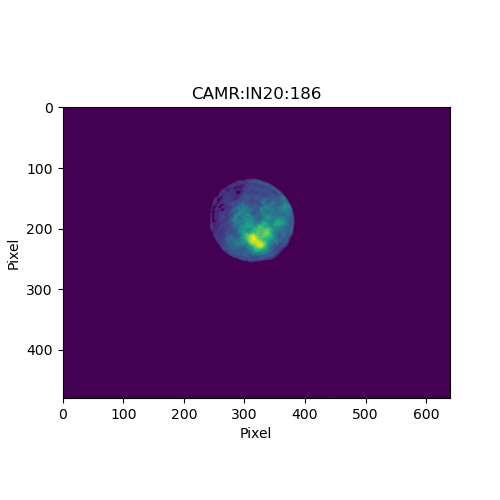

In [8]:
field.plot('laser_image', close=True)

#### Initial Electron Distribution

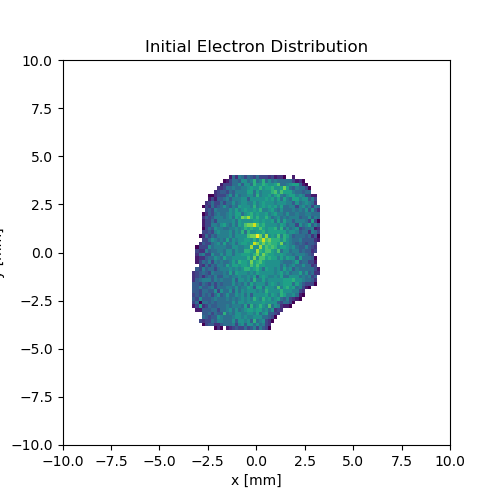

In [9]:
field.plot('initial_dist', save=True, close=False)

#### Final Electron Distribution

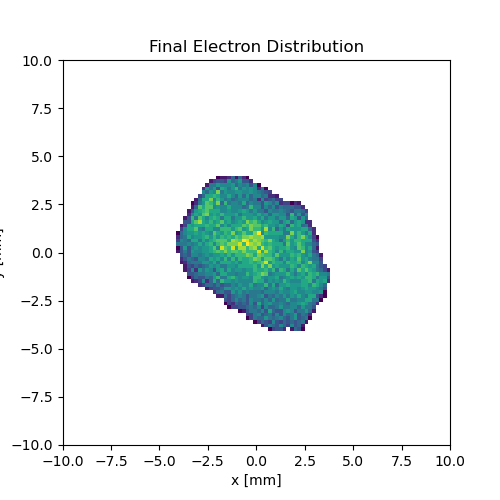

In [10]:
field.plot('final_dist', close=False)

#### Rotated Final Distribution

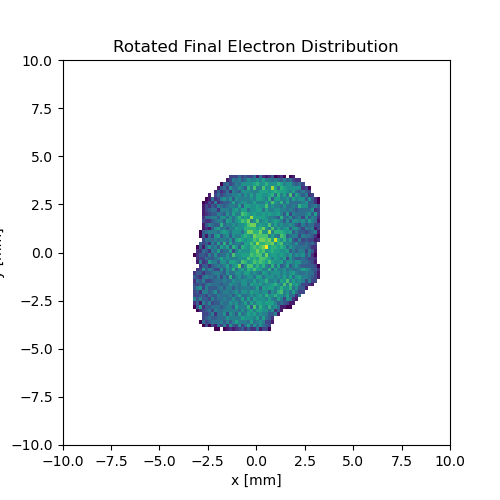

In [11]:
field.plot('rotated_final_dist')

### Compare Plots

#### Initial vs. Final Distribution

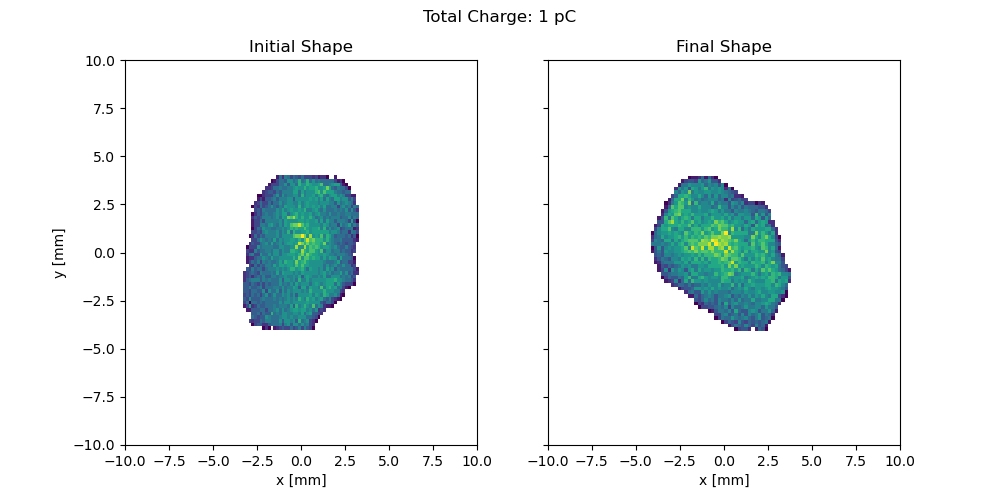

In [12]:
field.plot('initial_vs_final', title=f'Total Charge: {field.dist.input["total_charge"]["value"]} pC')

#### Initial vs. Rotated Final Distribution

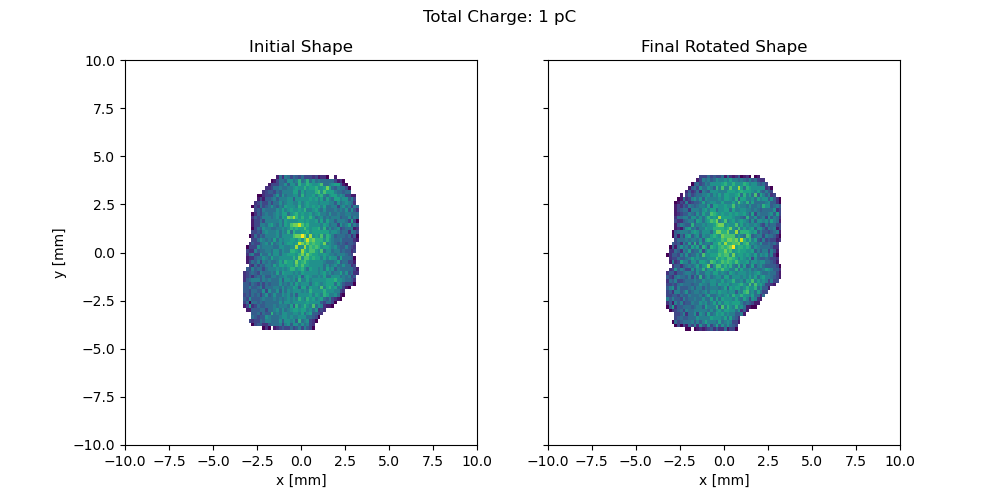

In [13]:
field.plot('initial_vs_rotated', title=f'Total Charge: {field.dist.input["total_charge"]["value"]} pC')

### Movie Plot

In [14]:
field.movie()

## Custom Plot (Beam Size vs. Mean Z)

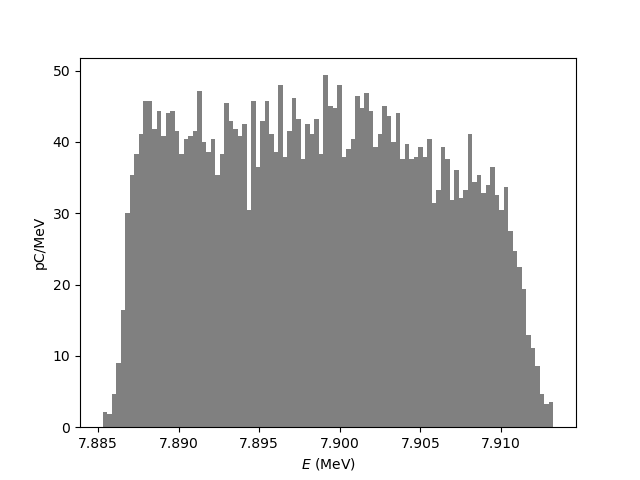

In [16]:
import matplotlib.pyplot as plt
xta = field.astra
test = xta.particles[-1].plot('energy')
plots_path = os.path.join(sim_path, field.name, 'plots')
plt.savefig(f'{plots_path}/{field.name}.jpg', dpi=250)
#plt.close()